In [5]:
from __future__ import print_function
import langid
import logging
import nltk
import numpy as np
import re
import sys
import time
from collections import defaultdict
from gensim import corpora
from optparse import OptionParser
from pymongo import MongoClient
from string import digits

from gensim import corpora, models, similarities
import pyLDAvis.gensim
import sys
from twitter_preprocessing_2 import preprocess
import warnings

from pymongo import MongoClient
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt
import numpy as np
import operator

from LSA import LSA


In [3]:
corpus, dictionary = preprocess('Israel')
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=4, passes=10)
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

this_many_docs 74


/Users/ariel/anaconda/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
2      27.072843        1       1 -0.020935 -0.071797
0      25.950263        1       2 -0.037378  0.104137
3      24.678258        1       3 -0.074757 -0.032204
1      22.298636        1       4  0.133070 -0.000136, topic_info=     Category        Freq             Term       Total  loglift  logprob
term                                                                    
2024  Default  334.000000           israel  334.000000  30.0000  30.0000
2173  Default   43.000000        apartheid   43.000000  29.0000  29.0000
2493  Default   43.000000             rudy   43.000000  28.0000  28.0000
869   Default   43.000000              tip   43.000000  27.0000  27.0000
2318  Default   43.000000       monteagudo   43.000000  26.0000  26.0000
2901  Default   40.000000         download   40.000000  25.0000  25.0000
2637  Default   44.000000       violations   44.000000  24.0000  24.0000
2459  Default   37.000000      humanrights   37.000000  23.0000  23.0000
1959  Default   29.000000  emet_news_press   29.000000  22.0000  22.0000
1903  Default   29.000000           horror   29.000000  21.0000  21.0000
836   Default   57.000000             gaza   57.000000  20.0000  20.0000
474   Default   64.000000           report   64.000000  19.0000  19.0000
501   Default   75.000000             iran   75.000000  18.0000  18.0000
1305  Default   22.000000        broadcast   22.000000  17.0000  17.0000
2385  Default   36.000000              bds   36.000000  16.0000  16.0000
864   Default   61.000000      palestinian   61.000000  15.0000  15.0000
3218  Default   39.000000        palestine   39.000000  14.0000  14.0000
174   Default   28.000000            india   28.000000  13.0000  13.0000
2060  Default   19.000000       fullrepeal   19.000000  12.0000  12.0000
3004  Default   32.000000          britney   32.000000  11.0000  11.0000
3226  Default   71.000000          israeli   71.000000  10.0000  10.0000
2002  Default   29.000000        obamacare   29.000000   9.0000   9.0000
2475  Default   19.000000        insurance   19.000000   8.0000   8.0000
1558  Default   33.000000              eid   33.000000   7.0000   7.0000
876   Default   22.000000          digital   22.000000   6.0000   6.0000
269   Default   15.000000          tourism   15.000000   5.0000   5.0000
3487  Default   14.000000        insurtech   14.000000   4.0000   4.0000
1284  Default   12.000000              ian   12.000000   3.0000   3.0000
3416  Default   37.000000           police   37.000000   2.0000   2.0000
891   Default   25.000000          muslims   25.000000   1.0000   1.0000
...       ...         ...              ...         ...      ...      ...
1314   Topic4    7.339393            gotta    9.076213   1.2882  -6.4991
2024   Topic4  210.718182           israel  334.959535   1.0372  -3.1418
2030   Topic4    6.655332            putin    8.251652   1.2856  -6.5969
1572   Topic4    4.116105            asmsg    4.944604   1.3173  -7.0774
474    Topic4   40.236420           report   64.160495   1.0340  -4.7975
965    Topic4    5.897690            round    7.433640   1.2692  -6.7178
2955   Topic4    5.887979           auspol    7.432864   1.2676  -6.7194
836    Topic4   35.775685             gaza   57.513832   1.0259  -4.9150
179    Topic4    9.871154            times   14.109173   1.1434  -6.2027
3218   Topic4   23.027945        palestine   39.248033   0.9675  -5.3556
855    Topic4    8.348689             dear   11.608830   1.1710  -6.3702
3148   Topic4    7.358414            books    9.936606   1.2003  -6.4965
3183   Topic4   10.774871           latest   16.649813   1.0655  -6.1151
186    Topic4   11.958737           travel   20.033415   0.9847  -6.0109
2055   Topic4   13.109892          history   24.276698   0.8845  -5.9190
1085   Topic4   36.109285            trump  160.983034   0.0059  -4.9058
3004   Topic4   14.074248          britney   32.876817  

 --------------------- 
   Silhouette Coefficient: 0.579
 --------------------- 
T0)
 0.307*israel
 0.258*trump
 0.126*people
 0.124*israeli
 0.112*obama
 0.100*palestinian
()
T1)
 0.513*israel
 0.265*israeli
 0.240*palestinian
 0.219*gaza
 0.187*trump
 0.169*bds
()
T2)
 0.337*israel
 0.333*palestinian
 0.287*israeli
 0.212*gaza
 0.191*palestine
 0.190*times
()


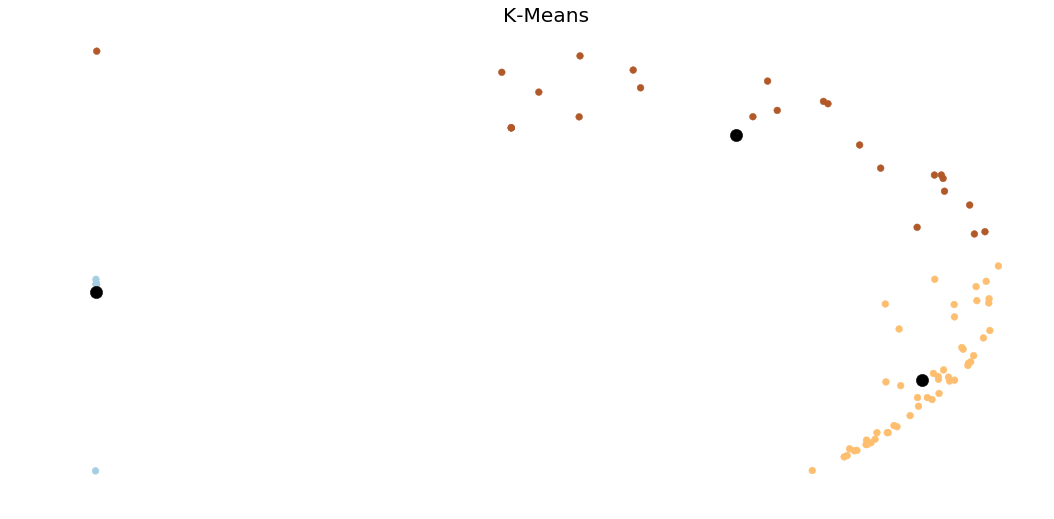

In [6]:
LSA()